## Project:- Face Mask Detection using Deep-Learning (KNN)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import numpy as np
import os
%matplotlib inline

In [2]:
import pathlib

In [3]:
data_dir='./dataset'

In [4]:
data_dir = pathlib.Path(data_dir)

In [5]:
data_dir

WindowsPath('dataset')

In [6]:
img=list(data_dir.glob('*/*.jpg'))[2]

In [7]:
img=str(img)

In [8]:
img=cv2.imread(img)

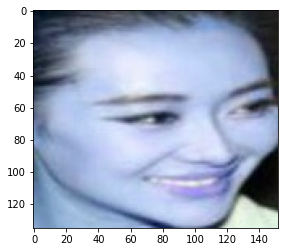

In [30]:
plt.imshow(img)

In [11]:
list(data_dir.glob('mask/*'))[:10]

[WindowsPath('dataset/mask/with_mask175.jpg'),
 WindowsPath('dataset/mask/with_mask176.jpg'),
 WindowsPath('dataset/mask/with_mask177.jpg'),
 WindowsPath('dataset/mask/with_mask178.jpg'),
 WindowsPath('dataset/mask/with_mask179.jpg'),
 WindowsPath('dataset/mask/with_mask180.jpg'),
 WindowsPath('dataset/mask/with_mask181.jpg'),
 WindowsPath('dataset/mask/with_mask182.jpg'),
 WindowsPath('dataset/mask/with_mask183.jpg'),
 WindowsPath('dataset/mask/with_mask184.jpg')]

In [12]:
images_dict={
    'mask': list(data_dir.glob('mask/*')),
    
    'nomask':list(data_dir.glob('nomask/*')),
}

In [13]:
images_dict['nomask'][:5]

[WindowsPath('dataset/nomask/100.jpg'),
 WindowsPath('dataset/nomask/101.jpg'),
 WindowsPath('dataset/nomask/102.jpg'),
 WindowsPath('dataset/nomask/104.jpg'),
 WindowsPath('dataset/nomask/105.jpg')]

In [52]:
images_labels_dict= {
    'mask': 1,
    'nomask':0,
}

In [53]:
images_labels_dict

{'mask': 1, 'nomask': 0}

In [54]:
X, y = [], []

for face_name, images in images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(60,60))
        X.append(resized_img)
        y.append(images_labels_dict[face_name])

In [55]:
X= np.array(X)
y= np.array(y)

In [56]:
X.shape

(652, 60, 60, 3)

In [57]:
y.shape

(652,)

### Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

#### Scaling Images

In [60]:
X_train_scaled= X_train/ 255
X_test_scaled = X_test / 255

### Build Convolutional neural network and train it

In [61]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [62]:
num_classes = 1

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
  layers.Flatten(),

    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    
  layers.Dense(num_classes, activation= 'sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=35)              

Epoch 1/35
17/17 [==============================] - 3s 105ms/step - loss: 0.7116 - accuracy: 0.5517
Epoch 2/35
17/17 [==============================] - 2s 106ms/step - loss: 0.5272 - accuracy: 0.7200
Epoch 3/35
17/17 [==============================] - 2s 102ms/step - loss: 0.3733 - accuracy: 0.8419
Epoch 4/35
17/17 [==============================] - 2s 104ms/step - loss: 0.2606 - accuracy: 0.9033
Epoch 5/35
17/17 [==============================] - 2s 104ms/step - loss: 0.2545 - accuracy: 0.9003
Epoch 6/35
17/17 [==============================] - 2s 113ms/step - loss: 0.1971 - accuracy: 0.9358
Epoch 7/35
17/17 [==============================] - 2s 115ms/step - loss: 0.2053 - accuracy: 0.9191
Epoch 8/35
17/17 [==============================] - 2s 106ms/step - loss: 0.2046 - accuracy: 0.9153
Epoch 9/35
17/17 [==============================] - 2s 101ms/step - loss: 0.1980 - accuracy: 0.9172
Epoch 10/35
17/17 [==============================] - 2s 101ms/step - loss: 0.1533 - accuracy: 0.9531

#### model evaluation

In [63]:
print(model.evaluate(X_test, y_test))

5/5 [==============================] - 1s 85ms/step - loss: 95.0533 - accuracy: 0.9237
[95.05325317382812, 0.9236640930175781]


In [72]:
predictions=model.predict(X_test)

In [73]:
predictions[:5]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [74]:
y_test[:5]

array([0, 1, 1, 1, 1])

In [75]:
y_pred= []
for element in predictions:
    if element> 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [76]:
y_pred[:10]

[0, 1, 1, 1, 1, 0, 0, 1, 0, 0]

In [77]:
y_test[:10]

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [78]:
img=X_test[0]

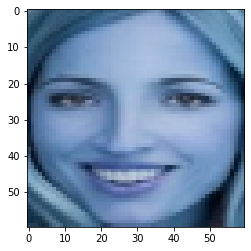

In [79]:
plt.imshow(img)